An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same

1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior.

### LOADING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### LOADING DATA

In [2]:
data = pd.read_csv('OnlineRetail (3).csv', encoding='unicode_escape')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data_null = round(100*(data.isnull().sum())/len(data),2)
data_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

As data null value percentage is less than 25% based on the size of data we 
can drop the null values. 
As per the 'OnlineRetail (3).csv' file, we have 541909 rows and 8 columns.
Therefore we can drop the null values. 

In [9]:
data = data.dropna()
data.shape

(406829, 8)

In [10]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
data['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [13]:
data.drop(['StockCode', 'Description'], axis=1, inplace=True)
data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
data['TotalPrice'] = data['Quantity']*data['UnitPrice']

In [15]:
data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


Text(0.5, 1.0, 'Countries with high sales')

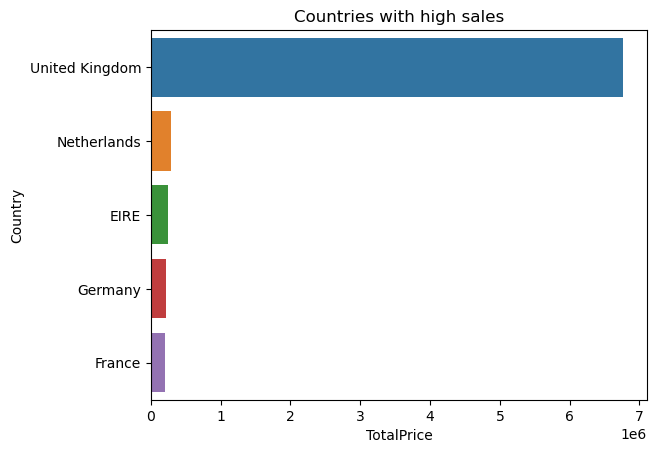

In [16]:
total = data.groupby('Country')['TotalPrice'].sum().reset_index().sort_values('TotalPrice', ascending=False)
sns.barplot(data=total.head(), x='TotalPrice', y='Country')
plt.title('Countries with high sales')

In [17]:
data.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [18]:
data = data[~data["InvoiceNo"].str.contains("C",na=False)]
data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


### DATA PREPARATION

We will be analyzing the customers based on 3 primary factors,                
F, M, R

1. F -> frequency, how frequent the customer buys, number of transactions
2. M -> monetary, total amount of transactions
3. R -> recency, last time they bought

In [19]:
#transforming invoice date to date month

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   Quantity     397924 non-null  int64         
 2   InvoiceDate  397924 non-null  datetime64[ns]
 3   UnitPrice    397924 non-null  float64       
 4   CustomerID   397924 non-null  float64       
 5   Country      397924 non-null  object        
 6   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 24.3+ MB


In [21]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [22]:
today_date = dt.datetime(2011, 12, 12)

In [23]:
rfm = data.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo': lambda InvoiceNo: InvoiceNo.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [24]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,327,1,77183.60
12347.0,4,7,4310.00
12348.0,77,4,1797.24
12349.0,20,1,1757.55
12350.0,312,1,334.40


In [25]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,327,1,77183.60
12347.0,4,7,4310.00
12348.0,77,4,1797.24
12349.0,20,1,1757.55
12350.0,312,1,334.40


In [26]:
rfm.columns

Index(['recency', 'frequency', 'monetary'], dtype='object')

In [27]:
rfm.describe()

,recency,frequency,monetary
count,4339.000000,4339.000000,4339.000000
mean,94.041484,4.271952,2053.793018
std,100.007757,7.705493,8988.248381
min,2.000000,1.000000,0.000000
25%,19.000000,1.000000,307.245000
50%,52.000000,2.000000,674.450000
75%,143.500000,5.000000,1661.640000
max,375.000000,210.000000,280206.020000


In [28]:
rfm.shape

(4339, 3)

In [31]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(rfm)

KMeans(n_clusters=5)

In [32]:
rfm["recency_score"]=pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1]) 

In [33]:
rfm.head()

,recency,frequency,monetary,recency_score
CustomerID,,,,
12346.0,327,1,77183.60,1
12347.0,4,7,4310.00,5
12348.0,77,4,1797.24,2
12349.0,20,1,1757.55,4
12350.0,312,1,334.40,1


In [34]:
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [35]:
rfm["monetary_score"]=pd.qcut(rfm["recency"],5,labels=[1,2,3,4,5]) 

In [36]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,327,1,77183.60,1,1,5
12347.0,4,7,4310.00,5,5,1
12348.0,77,4,1797.24,2,4,4
12349.0,20,1,1757.55,4,1,2
12350.0,312,1,334.40,1,1,5


In [37]:
rfm["RFM_SCORE"]=(rfm["recency_score"].astype(str)+rfm["frequency_score"].astype(str))

In [38]:
rfm.describe()

,recency,frequency,monetary
count,4339.000000,4339.000000,4339.000000
mean,94.041484,4.271952,2053.793018
std,100.007757,7.705493,8988.248381
min,2.000000,1.000000,0.000000
25%,19.000000,1.000000,307.245000
50%,52.000000,2.000000,674.450000
75%,143.500000,5.000000,1661.640000
max,375.000000,210.000000,280206.020000


In [39]:
rfm[rfm["RFM_SCORE"]=="55"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12347.0,4,7,4310.00,5,5,1,55
12362.0,5,10,5226.23,5,5,1,55
12417.0,5,9,3649.10,5,5,1,55
12423.0,2,8,1859.31,5,5,1,55
12433.0,2,7,13375.87,5,5,1,55


In [40]:
rfm[rfm["RFM_SCORE"]=="11"].head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12346.0,327,1,77183.6,1,1,5,11
12350.0,312,1,334.4,1,1,5,11
12353.0,206,1,89.0,1,1,5,11
12354.0,234,1,1079.4,1,1,5,11
12355.0,216,1,459.4,1,1,5,11


In [41]:
seg_map = {
    r'[1-2][1-2]': 'slumber',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cannot_loose',
    r'3[1-2]': 'abouttosleep',
    r'33': 'needattention',
    r'[3-4][4-5]': 'loyal',
    r'41': 'promising',
    r'51': 'newcustomers',
    r'[4-5][2-3]': 'potentialloyalists',
    r'5[4-5]': 'champions'
}

In [42]:
rfm["segment"]=rfm["RFM_SCORE"].replace(seg_map,regex=True)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346.0,327,1,77183.60,1,1,5,11,slumber
12347.0,4,7,4310.00,5,5,1,55,champions
12348.0,77,4,1797.24,2,4,4,24,at_risk
12349.0,20,1,1757.55,4,1,2,41,promising
12350.0,312,1,334.40,1,1,5,11,slumber


In [43]:
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["mean", "count"])

recency        frequency           monetary      
                          mean count       mean count         mean count
segment                                                                 
abouttosleep         54.312500   352   1.161932   352   471.994375   352
at_risk             154.785835   593   2.878583   593  1084.535297   593
cannot_loose        133.968254    63   8.380952    63  2796.155873    63
champions             7.361769   633  12.417062   633  6857.935482   633
loyal                34.608059   819   6.479853   819  2864.247791   819
needattention        53.427807   187   2.326203   187   897.627861   187
newcustomers          8.428571    42   1.000000    42   388.212857    42
potentialloyalists   18.398760   484   2.010331   484  1041.222004   484
promising            24.421053    95   1.000000    95   290.913158    95
slumber             218.605042  1071   1.101774  1071   488.643307  1071

<AxesSubplot:>

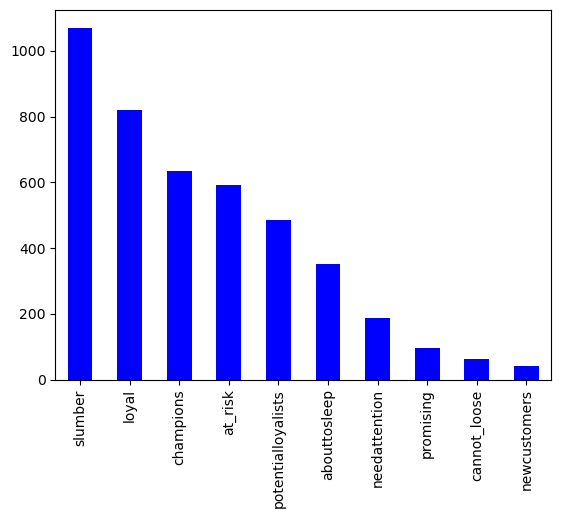

In [44]:
rfm["segment"].value_counts().plot(kind="bar",color="b")